# 교통사고유형별 발생분석
- 공공데이터포털 https://www.data.go.kr/index.do
<hr>
- 공공 데이터 교통사고 유형, 검색어: 전국교통사고다발지역표준데이터
- CSV 파일 받기
<div style="display:flex">
    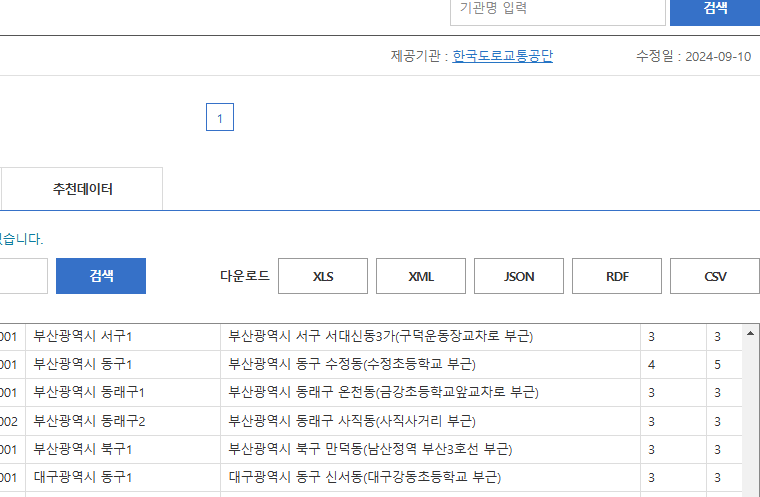
    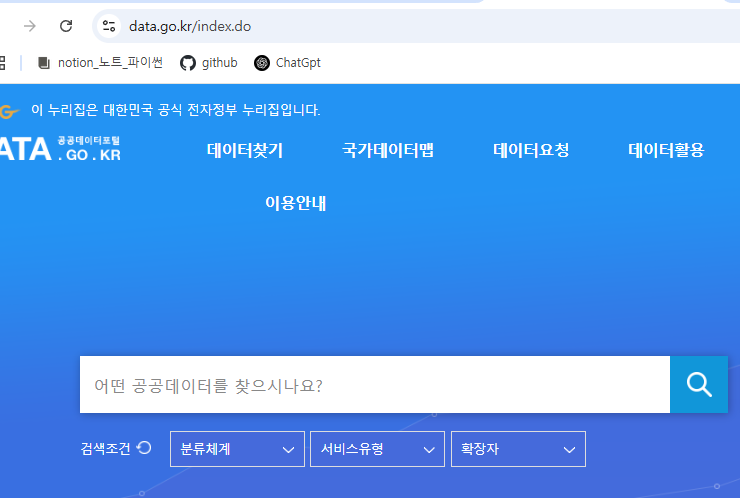
</div>

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd

# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [22]:
file_path = "./ref/전국교통사고다발지역표준데이터.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") # csv : 콤마로 이루어진 데이터 집합
ori

,사고지역관리번호,사고연도,사고유형구분,위치코드,사고다발지역시도시군구,사고지역위치명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,제공기관코드,제공기관명
0,2021030,2020,무단횡단,15134300,충북 청주흥덕1,충청북도 청주시 흥덕구 봉명동(은파교회 부근),4,4,0,2,2,0,36.650390,127.456188,"{type:Polygon,coordinates:[[[127.45888288,36.6...",2024-09-09,B555234,한국도로교통공단
1,2021030,2020,무단횡단,16044400,충남 서산1,충청남도 서산시 석림동(하트리움 부근),5,5,0,3,2,0,36.777868,126.460281,"{type:Polygon,coordinates:[[[126.46297567,36.7...",2024-09-09,B555234,한국도로교통공단
2,2021030,2020,무단횡단,16054400,충남 천안서북1,충청남도 천안시 서북구 성정동(엔제리너스천안성정 부근),5,6,1,1,4,0,36.826788,127.140857,"{type:Polygon,coordinates:[[[127.14355147,36.8...",2024-09-09,B555234,한국도로교통공단
3,2021030,2020,무단횡단,16054400,충남 천안서북2,충청남도 천안시 서북구 성정동(LG천막 부근),5,6,0,1,5,0,36.810455,127.140805,"{type:Polygon,coordinates:[[[127.14349966,36.8...",2024-09-09,B555234,한국도로교통공단
4,2021030,2020,무단횡단,16054400,충남 천안서북3,충청남도 천안시 서북구 두정동(플라리안 부근),4,5,0,3,2,0,36.833746,127.140057,"{type:Polygon,coordinates:[[[127.14275156,36.8...",2024-09-09,B555234,한국도로교통공단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,2015046,2014,자전거,11710010,서울특별시 송파구10,서울특별시 송파구 거여동(마천사거리 부근),8,8,0,0,4,4,37.497152,127.146265,"{type:Polygon,coordinates:[[[127.1478646,37.49...",2024-09-09,B555234,한국도로교통공단
14474,2015046,2014,자전거,11710011,서울특별시 송파구11,서울특별시 송파구 신천동(잠실역_일반국도3호선_진입_1 부근),7,8,0,4,4,0,37.514094,127.099354,"{type:Polygon,coordinates:[[[127.1009533,37.51...",2024-09-09,B555234,한국도로교통공단
14475,2015046,2014,자전거,11710012,서울특별시 송파구12,서울특별시 송파구 삼전동(신양빌라 부근),7,7,0,4,2,1,37.501233,127.085015,"{type:Polygon,coordinates:[[[127.0866148,37.50...",2024-09-09,B555234,한국도로교통공단
14476,2015046,2014,자전거,11710013,서울특별시 송파구13,서울특별시 송파구 가락동(문정시영아파트 부근),7,7,0,2,2,3,37.492374,127.136029,"{type:Polygon,coordinates:[[[127.1376285,37.49...",2024-09-09,B555234,한국도로교통공단


In [23]:
ori_data = ori.groupby('사고유형구분')['사고건수'].sum().reset_index(name="count")
ori_data = ori_data.sort_values('count',ascending=False)
ori_data = ori_data.rename(columns={'사고유형구분':'type'}) #,'사고건수':count})
ori_data

,type,count
4,자전거,24939
1,보행노인,23165
0,무단횡단,14805
2,보행어린이,3802
3,스쿨존어린이,989


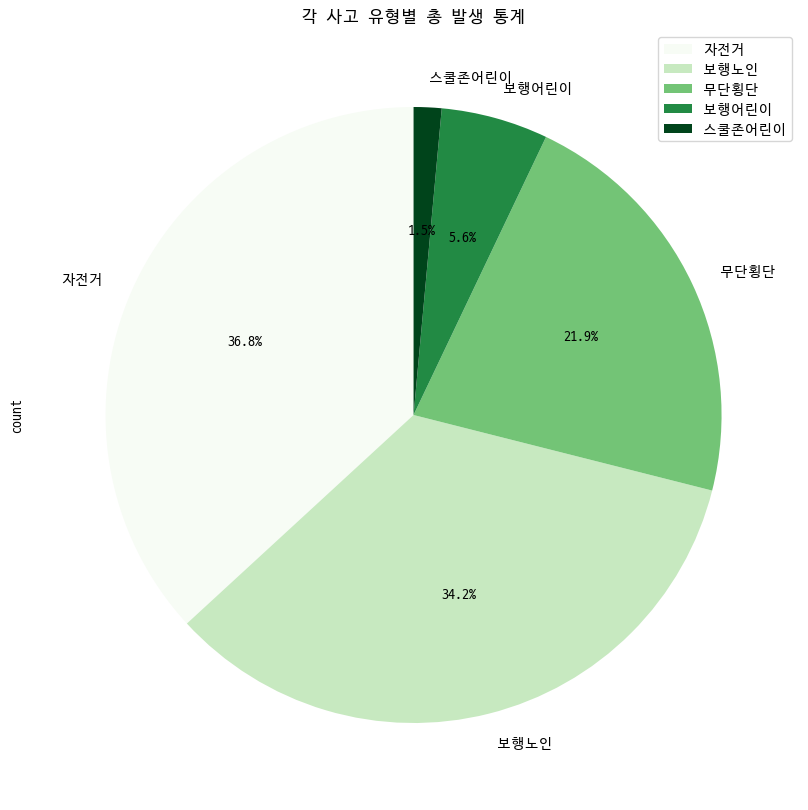

In [42]:
ori_data.plot(
    kind='pie', 
    y='count', 
    labels=ori_data['type'], 
    figsize=(10,10),
    startangle=90,
    autopct='%2.1f%%',
    title="각 사고 유형별 총 발생 통계", 
    cmap=matplotlib.cm.Greens
)

plt.savefig('./chart/accident.png')
plt.show()

In [60]:
ex_data = ori.copy()
ex2_data = ex_data.rename(columns={'사고유형구분':'type'})
ex2_data = ex2_data['type']

data_list=[]
for t in ex2_data:
    data_list.append(ex2_data[ex2_data['type'] == t])
data_list

KeyError: 'type'